In [66]:
import pandas as pd
import os
import sys
import pathlib as Path

VERSION = 4
COMPLETEDVERSION = 1

sys.path.append(os.path.abspath("../"))

In [67]:
def getFiles():
    fileExist = True
    EPOCH = 1
    reportPath = (
        "./../GameModels/v{ver}/Report/rp-{comVer}-epc-{epoch}.csv"
    )

    while fileExist:
        if os.path.exists(
                reportPath.format(
                    ver=VERSION, comVer=COMPLETEDVERSION, epoch=EPOCH
                )
            ):
                print(
                    reportPath.format(
                        ver=VERSION, comVer=COMPLETEDVERSION, epoch=EPOCH
                    )
                )
                EPOCH += 1
        else:
            fileExist = False
            
    return EPOCH

In [68]:
totalEpoch = getFiles()

./../GameModels/v4/Report/rp-1-epc-1.csv
./../GameModels/v4/Report/rp-1-epc-2.csv
./../GameModels/v4/Report/rp-1-epc-3.csv
./../GameModels/v4/Report/rp-1-epc-4.csv
./../GameModels/v4/Report/rp-1-epc-5.csv
./../GameModels/v4/Report/rp-1-epc-6.csv
./../GameModels/v4/Report/rp-1-epc-7.csv
./../GameModels/v4/Report/rp-1-epc-8.csv
./../GameModels/v4/Report/rp-1-epc-9.csv
./../GameModels/v4/Report/rp-1-epc-10.csv
./../GameModels/v4/Report/rp-1-epc-11.csv
./../GameModels/v4/Report/rp-1-epc-12.csv
./../GameModels/v4/Report/rp-1-epc-13.csv
./../GameModels/v4/Report/rp-1-epc-14.csv
./../GameModels/v4/Report/rp-1-epc-15.csv
./../GameModels/v4/Report/rp-1-epc-16.csv
./../GameModels/v4/Report/rp-1-epc-17.csv
./../GameModels/v4/Report/rp-1-epc-18.csv
./../GameModels/v4/Report/rp-1-epc-19.csv
./../GameModels/v4/Report/rp-1-epc-20.csv
./../GameModels/v4/Report/rp-1-epc-21.csv
./../GameModels/v4/Report/rp-1-epc-22.csv


In [69]:
def arrayDataframes(totalEpoch):
    array = []
    reportPath = "./../GameModels/v{ver}/Report/rp-{comVer}-epc-{epoch}.csv"
    for epoch in range(1, totalEpoch):
        dataframe = pd.read_csv(
            reportPath.format(ver=VERSION, comVer=COMPLETEDVERSION, epoch=epoch)
        )
        array.append(dataframe)
    return array
        

In [70]:
arrayDataframe = arrayDataframes(totalEpoch)

In [71]:
def summaryDataframes(arrayDataframe):
    df = pd.DataFrame()
    chkpnt = 1

    for dataframe in arrayDataframe:
        dictValue = {
            "ckpnt": chkpnt,
            "loss": (dataframe["status"] == "loss").sum(),
            "win": (dataframe["status"] == "win").sum(),
            "draw": (dataframe["status"] == "draw").sum(),
        }
        chkpnt = chkpnt + 1
        df = pd.concat([df, pd.DataFrame.from_records([dictValue])], ignore_index=True)
    return df

In [72]:
df = summaryDataframes(arrayDataframe)


In [73]:
df.head()

,ckpnt,loss,win,draw
0,1,575,355,69
1,2,509,256,234
2,3,605,152,242
3,4,601,150,248
4,5,576,380,43


In [74]:
print(f"Version: {VERSION}")
df.median()

Version: 4


ckpnt     11.5
loss     577.5
win      367.5
draw      60.0
dtype: float64

<Axes: >

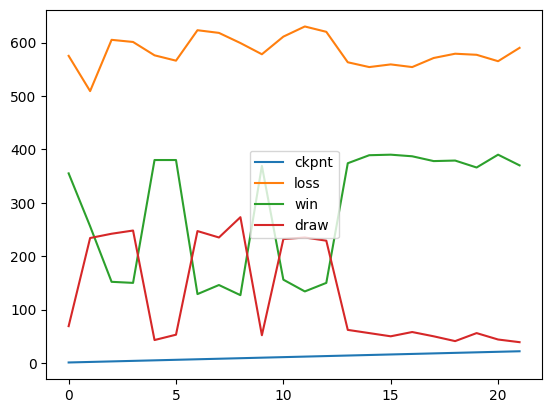

In [75]:
df.plot()

In [76]:
df["percentage"] = round((df["win"]*100/(df["win"]+df["loss"])),2)
df

,ckpnt,loss,win,draw,percentage
0,1,575,355,69,38.17
1,2,509,256,234,33.46
2,3,605,152,242,20.08
3,4,601,150,248,19.97
4,5,576,380,43,39.75
5,6,566,380,53,40.17
6,7,623,129,247,17.15
7,8,618,146,235,19.11
8,9,599,127,273,17.49
9,10,578,369,52,38.97
